<a href="https://colab.research.google.com/github/lvande/SEP_769_Project/blob/main/SEP769_Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading** the Data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_classif


#define paths
path="/content/drive/MyDrive/SEP769_Project/iot_telemetry_data.csv"

In [3]:
df_data=pd.read_csv(path)
print(df_data)

data=df_data.values
print(data)

                  ts             device        co   humidity  light       lpg  \
0       1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1       1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2       1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3       1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4       1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   
...              ...                ...       ...        ...    ...       ...   
405179  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   
405180  1.595203e+09  b8:27:eb:bf:9d:51  0.005882  48.500000  False  0.008660   
405181  1.595203e+09  1c:bf:ce:15:ec:4d  0.004540  75.699997   True  0.007181   
405182  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   
405183  1.595203e+09  b8:27:eb:bf:9d:51  0.005914  48.400000  False  0.008695   

        motion     smoke   

In [4]:
df_data_0 = df_data[df_data.device == 'b8:27:eb:bf:9d:51']
data_0 = df_data_0.values
print(data_0)

df_data_1 = df_data[df_data.device == '00:0f:00:70:91:0a']
data_1 = df_data_1.values
print(data_1)

df_data_2 = df_data[df_data.device == '1c:bf:ce:15:ec:4d']
data_2 = df_data_2.values
print(data_2)

[[1594512094.3859746 'b8:27:eb:bf:9d:51' 0.0049559386483912 ... False
  0.0204112701224129 22.7]
 [1594512098.0735729 'b8:27:eb:bf:9d:51' 0.0049760123404216 ... False
  0.0204751255761782 22.6]
 [1594512101.761235 'b8:27:eb:bf:9d:51' 0.0049673636419089 ... False
  0.0204476208102336 22.6]
 ...
 [1595203409.8898065 'b8:27:eb:bf:9d:51' 0.0058766083289218 ... False
  0.0232837263145341 22.3]
 [1595203413.5765607 'b8:27:eb:bf:9d:51' 0.0058822623157222 ... False
  0.0233010348094289 22.2]
 [1595203417.2643125 'b8:27:eb:bf:9d:51' 0.0059144819796318 ... False
  0.0233995965280018 22.2]]
[[1594512094.7355676 '00:0f:00:70:91:0a' 0.0028400886071015 ... False
  0.0132748367048515 19.700000762939453]
 [1594512106.869076 '00:0f:00:70:91:0a' 0.0029381156266604 ... False
  0.0136275211320191 19.700000762939453]
 [1594512122.7857318 '00:0f:00:70:91:0a' 0.0029050147565559 ... False
  0.0135087333295562 19.700000762939453]
 ...
 [1595203405.0398898 '00:0f:00:70:91:0a' 0.003744628049894 ... False
  0.016



```
# This is formatted as code
```

Visualization and Analysis

<BarContainer object of 3 artists>

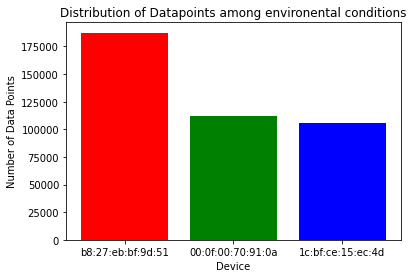

In [5]:
# plot quantities of datapoints for each device
plt.figure()
plt.title("Distribution of Datapoints among environental conditions")
plt.xlabel("Device")
plt.ylabel("Number of Data Points")
plt.bar(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'], [len(data_0), len(data_1), len(data_2)], color=['r','g', 'b'])

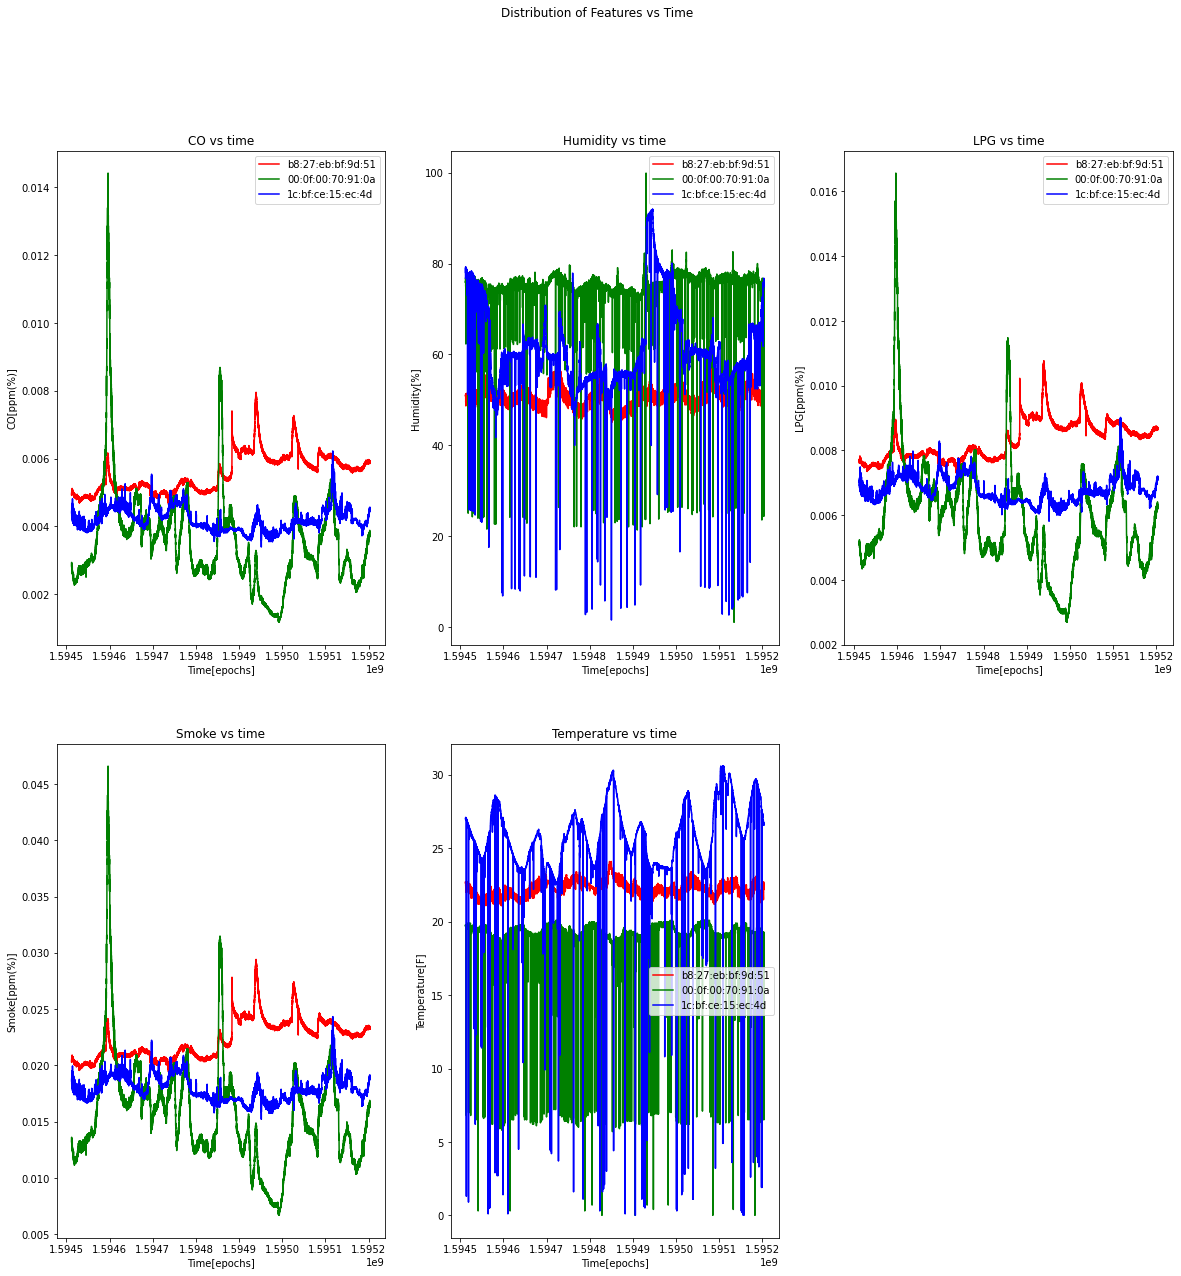

In [6]:
#plot different features vs time
plt.figure(figsize=(20,20))
plt.suptitle("Distribution of Features vs Time")

plt.subplot(2,3,1)
plt.title("CO vs time")
plt.xlabel("Time[epochs]")
plt.ylabel("CO[ppm(%)]")
plt.plot(data_0[:,0], data_0[:,2], color='r', label='b8:27:eb:bf:9d:51')
plt.plot(data_1[:,0], data_1[:,2], color='g', label='00:0f:00:70:91:0a')
plt.plot(data_2[:,0], data_2[:,2], color='b', label='1c:bf:ce:15:ec:4d')
plt.legend()

plt.subplot(2,3,2)
plt.title("Humidity vs time")
plt.xlabel("Time[epochs]")
plt.ylabel("Humidity[%]")
plt.plot(data_0[:,0], data_0[:,3], color='r', label='b8:27:eb:bf:9d:51')
plt.plot(data_1[:,0], data_1[:,3], color='g', label='00:0f:00:70:91:0a')
plt.plot(data_2[:,0], data_2[:,3], color='b', label='1c:bf:ce:15:ec:4d')
plt.legend()

plt.subplot(2,3,3)
plt.title("LPG vs time")
plt.xlabel("Time[epochs]")
plt.ylabel("LPG[ppm(%)]")
plt.plot(data_0[:,0], data_0[:,5], color='r', label='b8:27:eb:bf:9d:51')
plt.plot(data_1[:,0], data_1[:,5], color='g', label='00:0f:00:70:91:0a')
plt.plot(data_2[:,0], data_2[:,5], color='b', label='1c:bf:ce:15:ec:4d')
plt.legend()

plt.subplot(2,3,4)
plt.title("Smoke vs time")
plt.xlabel("Time[epochs]")
plt.ylabel("Smoke[ppm(%)]")
plt.plot(data_0[:,0], data_0[:,7], color='r', label='b8:27:eb:bf:9d:51')
plt.plot(data_1[:,0], data_1[:,7], color='g', label='00:0f:00:70:91:0a')
plt.plot(data_2[:,0], data_2[:,7], color='b', label='1c:bf:ce:15:ec:4d')

plt.subplot(2,3,5)
plt.title("Temperature vs time")
plt.xlabel("Time[epochs]")
plt.ylabel("Temperature[F]")
plt.plot(data_0[:,0], data_0[:,8], color='r', label='b8:27:eb:bf:9d:51')
plt.plot(data_1[:,0], data_1[:,8], color='g', label='00:0f:00:70:91:0a')
plt.plot(data_2[:,0], data_2[:,8], color='b', label='1c:bf:ce:15:ec:4d')
plt.legend()
plt.legend()

In [7]:
#split into labels and features
labels=data[:,1]
features=data[:,2:]

print(labels)

#convert labels to numbers
for i in range(len(labels)):
  if labels[i]=='b8:27:eb:bf:9d:51':
    labels[i]=0
  elif labels[i]=='00:0f:00:70:91:0a':
    labels[i]=1
  else:
    labels[i]=2

labels=labels.astype('int')
print(labels)

['b8:27:eb:bf:9d:51' '00:0f:00:70:91:0a' 'b8:27:eb:bf:9d:51' ...
 '1c:bf:ce:15:ec:4d' '00:0f:00:70:91:0a' 'b8:27:eb:bf:9d:51']
[0 1 0 ... 2 1 0]


In [8]:
#Selecting the  best features in  dataset
df_features=df_data[['co','humidity','light','lpg','motion','smoke','temp']]
df_labels=df_data['device']
MI_score = mutual_info_classif(df_features, df_labels, n_neighbors=5)
for feature in zip(df_features, MI_score):
  print(feature)

('co', 1.0557886973661963)
('humidity', 0.9384487371231287)
('light', 0.5164856108831413)
('lpg', 1.0557895537741384)
('motion', 0.0008665325146406389)
('smoke', 1.0557925144344875)
('temp', 1.0554895950383774)


In [9]:
#convert true or false values in light column to numerical values
for i in range(len(features[:,2])):
  if features[i,2]==False:
    features[i,2]=0
  elif features[i,2]==True:
    features[i,2]=1
features=np.asarray(features).astype(np.float32)
print(features)

[[4.9559386e-03 5.1000000e+01 0.0000000e+00 ... 0.0000000e+00
  2.0411270e-02 2.2700001e+01]
 [2.8400887e-03 7.6000000e+01 0.0000000e+00 ... 0.0000000e+00
  1.3274836e-02 1.9700001e+01]
 [4.9760123e-03 5.0900002e+01 0.0000000e+00 ... 0.0000000e+00
  2.0475125e-02 2.2600000e+01]
 ...
 [4.5404616e-03 7.5699997e+01 1.0000000e+00 ... 0.0000000e+00
  1.9075958e-02 2.6600000e+01]
 [3.7446280e-03 7.5300003e+01 0.0000000e+00 ... 0.0000000e+00
  1.6436744e-02 1.9200001e+01]
 [5.9144818e-03 4.8400002e+01 0.0000000e+00 ... 0.0000000e+00
  2.3399597e-02 2.2200001e+01]]


Models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

K-Nearest Neigbours Algorithm
{'KNN Accuracy:': 0.9999382997889853}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37612
           1       1.00      1.00      1.00     22298
           2       1.00      1.00      1.00     21127

    accuracy                           1.00     81037
   macro avg       1.00      1.00      1.00     81037
weighted avg       1.00      1.00      1.00     81037



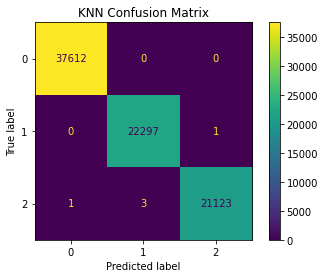

In [11]:
#knn
knn = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')

knn.fit(X_train, y_train)

y_predKNN = knn.predict(X_test)

print("K-Nearest Neigbours Algorithm")

print ({"KNN Accuracy:":metrics.accuracy_score(y_test,y_predKNN)})

print(metrics.classification_report(y_test,y_predKNN))

knn_CM = metrics.confusion_matrix(y_test,y_predKNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_CM, display_labels = ['0','1','2'])

cm_display.plot()

plt.title('KNN Confusion Matrix')

plt.show()

Gaussian Naive Bayes Algorithm
{'Gaussian NB Accuracy:': 0.9881658995273764}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37612
           1       1.00      0.98      0.99     22298
           2       0.96      1.00      0.98     21127

    accuracy                           0.99     81037
   macro avg       0.99      0.99      0.99     81037
weighted avg       0.99      0.99      0.99     81037



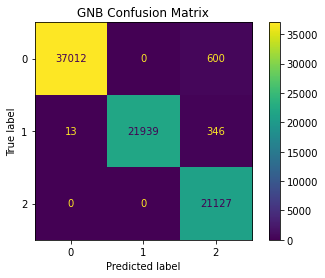

In [12]:
#gaussian naive bayes
gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_predGNB = gnb.predict(X_test)

print("Gaussian Naive Bayes Algorithm")

print ({"Gaussian NB Accuracy:":metrics.accuracy_score(y_test,y_predGNB)})

print(metrics.classification_report(y_test,y_predGNB))

gnb_CM = metrics.confusion_matrix(y_test,y_predGNB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_CM, display_labels = ['0','1','2'])

cm_display.plot()

plt.title('GNB Confusion Matrix')

plt.show()

In [13]:
#deep learning
DL_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, input_shape=[X_train.shape[1]], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
    tf.keras.layers.Dropout(0.01)
])

DL_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [14]:
history=DL_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)


Epoch 1/5
2026/2026 [==============================] - 8s 3ms/step - loss: 0.5625 - accuracy: 0.9019 - val_loss: 0.0490 - val_accuracy: 0.9872
Epoch 2/5
2026/2026 [==============================] - 6s 3ms/step - loss: 0.1111 - accuracy: 0.9743 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 3/5
2026/2026 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9755 - val_loss: 0.0351 - val_accuracy: 0.9847
Epoch 4/5
2026/2026 [==============================] - 5s 2ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0291 - val_accuracy: 0.9851
Epoch 5/5
2026/2026 [==============================] - 5s 2ms/step - loss: 0.0567 - accuracy: 0.9810 - val_loss: 0.0117 - val_accuracy: 0.9978


In [15]:
test_loss, test_acc = DL_model.evaluate(X_test, y_test, verbose=2)

print("test acc is", test_acc)

2533/2533 - 3s - loss: 0.0115 - accuracy: 0.9977 - 3s/epoch - 1ms/step
test acc is 0.9977170825004578


Text(0.5, 1.0, 'Accuracy vs Epoch')

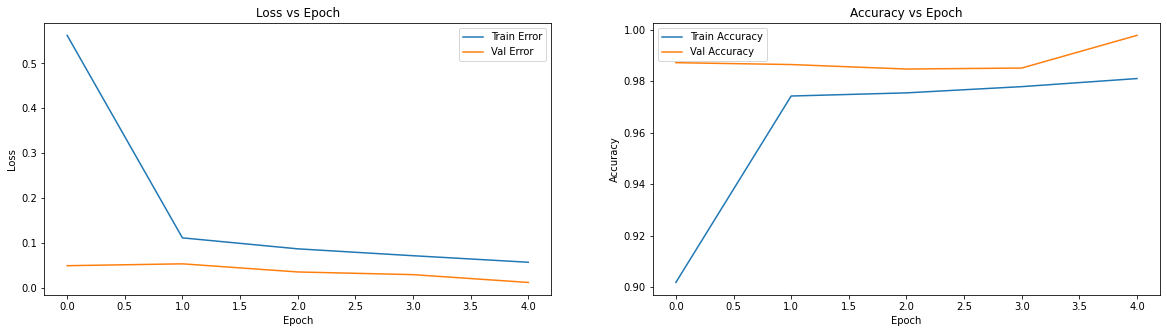

In [16]:
hist = pd.DataFrame(history.history)
hist["epoch"]=history.epoch

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'],hist['loss'],label='Train Error')
plt.plot(hist['epoch'],hist['val_loss'], label='Val Error')
plt.legend()
plt.title("Loss vs Epoch")

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'],hist['accuracy'],label='Train Accuracy')
plt.plot(hist['epoch'],hist['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy vs Epoch")